<a href="https://colab.research.google.com/github/saivenkatreddy29/Pytorch-Learning/blob/main/Pytorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
import sklearn as sk


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples = 1000)

In [22]:
data = pd.DataFrame(data = {'variable1' : X[:,0], 'variable2': X[:,1], 'label': y})

In [23]:
data

,variable1,variable2,label
0,0.990461,-0.137790,0
1,-0.248690,-0.968583,0
2,0.723862,-0.340623,1
3,0.394182,-0.696147,1
4,-0.799937,-0.010053,1
...,...,...,...
995,-0.947098,-0.320944,0
996,-0.587785,0.809017,0
997,-0.037690,0.999289,0
998,-0.208673,0.772305,1


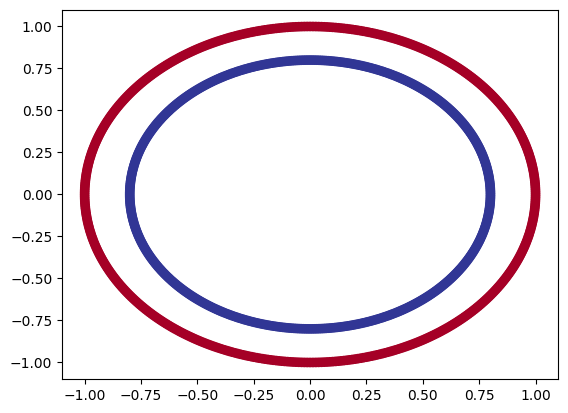

In [24]:
plt.scatter(data['variable1'],data['variable2'],c = y,cmap=plt.cm.RdYlBu)

In [25]:
y_tes = data['label']

In [26]:
import torch
y_tes = y_tes.to_numpy()

In [27]:
y_tes = torch.from_numpy(y_tes)

In [28]:
data = data.drop('label',axis = 1)

In [29]:
X_tes = data.to_numpy()

In [30]:
X_tes = torch.from_numpy(X_tes)

In [31]:
X_tes.shape

torch.Size([1000, 2])

In [46]:
X_tes = torch.tensor(X_tes, dtype = torch.float32)
y_tes = torch.tensor(y_tes,dtype = torch.float32)

<ipython-input-46-d48ba99c0cde>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tes = torch.tensor(X_tes, dtype = torch.float32)
<ipython-input-46-d48ba99c0cde>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tes = torch.tensor(y_tes,dtype = torch.float32)


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tes, y_tes)


# **Build a Pytorch Model**

In [33]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [34]:
import torch.nn as nn

In [35]:
class MakeCircles(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(2, 8)
    self.layer2 = nn.Linear(8,1)
  def forward(self, x):
    return self.layer2(self.layer1(x))



In [37]:
model0 = MakeCircles().to(device)
model0

MakeCircles(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=1, bias=True)
)

# **Make predictions using random weights of the model**

In [42]:
X_test[:10]

tensor([[ 0.9471, -0.3209],
        [-0.7510, -0.2757],
        [-0.3854,  0.7010],
        [-0.7994,  0.0302],
        [ 0.7026,  0.7115],
        [ 0.6471,  0.7624],
        [-0.0879,  0.9961],
        [ 0.0803,  0.7960],
        [ 0.5144, -0.8575],
        [-0.9993, -0.0377]], dtype=torch.float64)

In [63]:
y_pred = model0(X_test)
y_pred[:10].squeeze()

tensor([-0.1401, -0.6767, -0.6762, -0.9555, -0.1320, -0.2166, -0.7444, -0.9155,
        -0.7772, -0.0860], grad_fn=<SqueezeBackward0>)

In [52]:
loss = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model0.parameters(), lr = 0.1)

In [54]:
y_logits = model0(X_test).squeeze()
y_pred = torch.round(torch.sigmoid(y_logits))

y_logits[:10], y_pred[:10]

(tensor([-0.1401, -0.6767, -0.6762, -0.9555, -0.1320, -0.2166, -0.7444, -0.9155,
         -0.7772, -0.0860], grad_fn=<SliceBackward0>),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<SliceBackward0>))

In [56]:
epochs = 100

In [57]:
def accuracy(y_true, y_pred):
  count = torch.eq(y_true, y_pred).sum().item()
  return count/len(y_pred)

In [62]:
for epoch in range(epochs):

  # set the model into training mode
  model0.train()

  # Forward pass
  train_logits = model0(X_train).squeeze()

  # convert Logits into predictions
  train_preds = torch.round(torch.sigmoid(train_logits))

  # calculate the loss
  train_loss = loss(train_logits, y_train)

  # zero grad
  optimizer.zero_grad()

  # train loss back propagation
  train_loss.backward()

  # train accuracy
  train_accuracy = accuracy(y_train, train_preds)

  ## Testing loop

  model0.eval()
  with torch.inference_mode():
    test_logits = model0(X_test).squeeze()
    # conver the logits into predictions
    test_preds = torch.round(torch.sigmoid(test_logits))

    # loss calculation
    test_loss = loss(test_logits,y_test)

    test_accuracy = accuracy(y_test, test_preds)
  if epoch % 10 == 0:
    print(f'for {epoch} epoch, training loss : {train_loss:.2f}, training accuracy: {train_accuracy: .2f}')
    print(f'for {epoch} epoch, testing loss : {test_loss: .2f}, testing accuracy: {test_accuracy: .2f}')
    print('\n')





for 0 epoch, training loss : 0.74, training accuracy:  0.49
for 0 epoch, testing loss :  0.72, testing accuracy:  0.53


for 10 epoch, training loss : 0.74, training accuracy:  0.49
for 10 epoch, testing loss :  0.72, testing accuracy:  0.53


for 20 epoch, training loss : 0.74, training accuracy:  0.49
for 20 epoch, testing loss :  0.72, testing accuracy:  0.53


for 30 epoch, training loss : 0.74, training accuracy:  0.49
for 30 epoch, testing loss :  0.72, testing accuracy:  0.53


for 40 epoch, training loss : 0.74, training accuracy:  0.49
for 40 epoch, testing loss :  0.72, testing accuracy:  0.53


for 50 epoch, training loss : 0.74, training accuracy:  0.49
for 50 epoch, testing loss :  0.72, testing accuracy:  0.53


for 60 epoch, training loss : 0.74, training accuracy:  0.49
for 60 epoch, testing loss :  0.72, testing accuracy:  0.53


for 70 epoch, training loss : 0.74, training accuracy:  0.49
for 70 epoch, testing loss :  0.72, testing accuracy:  0.53


for 80 epoch, trai

**Plot the graphs and see what is going wrong**

In [68]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('the file already exists')
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

In [72]:
len(X_train), len(y_train), len(X_test), len(y_test)

(750, 750, 250, 250)

In [75]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([750, 2]),
 torch.Size([750]),
 torch.Size([250, 2]),
 torch.Size([250]))

In [78]:
import matplotlib.pyplot as plt

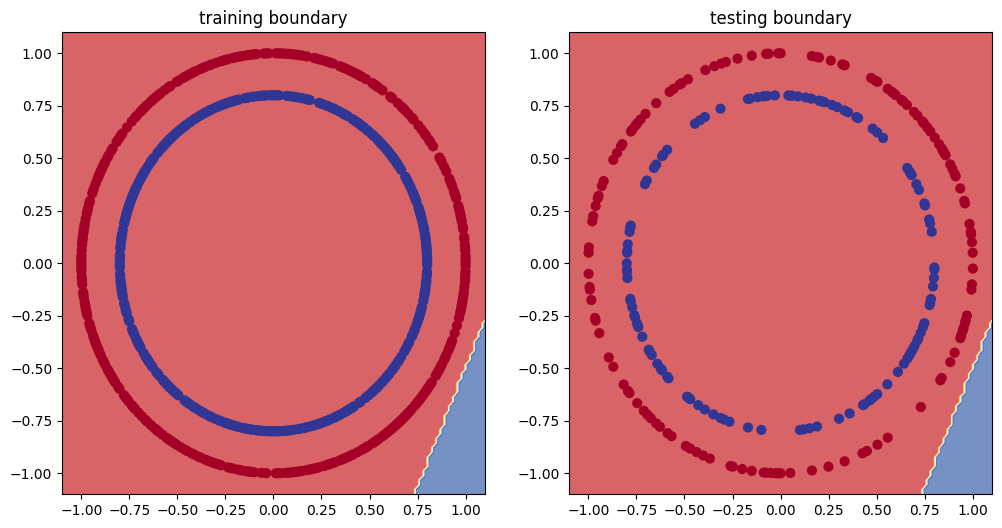

In [82]:
from helper_functions import plot_predictions, plot_decision_boundary
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title('training boundary')
plot_decision_boundary(model0, X_train, y_train)
plt.subplot(1,2,2)
plt.title('testing boundary')
plot_decision_boundary(model0, X_test, y_test)


In [83]:
class CircleModelv1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(2, 16)
    self.layer2 = nn.Linear(16, 32)
    self.layer3 = nn.Linear(32, 1)

  def forward(self, x):
    z = self.layer1(x)
    z = self.layer2(x)
    z = self.layer3(x)
    return x

In [85]:
model1 = CircleModelv1().to(device)
model1

CircleModelv1(
  (layer1): Linear(in_features=2, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=1, bias=True)
)

In [86]:
loss = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params = model1.parameters(), lr = 0.1)

In [ ]:
epochs = 1000

In [ ]:
for epoch in range(epochs):

  # set model to training mode
  model1.train()

  # forward pass and get the predictions
  train_logits = model1(X_train).squeeze()

  # get the proper predictions from the logits
  train_preds = torch.round(torch.sigmoid(train_logits))

  # calculate the loss
  train_loss = loss(train_logits, y_train)

  # make optim grad zero
  optimizer.zero_grad()

  # backpropagation
  optimizer.backward()

  ### Testing loop


